### Melanoma Detection - Problem Statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [ ]:
# Importing required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D
from tensorflow.python.ops.gen_nn_ops import MaxPool

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining the path for train and test images when using Colab
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
# # Defining the path for train and test images when using local Jupyter
# data_dir_train = pathlib.Path("CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train")
# data_dir_test = pathlib.Path('CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2259
118


In [ ]:
# Defining the parameters
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# ## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
# Importing the Train & Validation datasets when using Local Jupyter Notebook
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels="inferred",label_mode="categorical",batch_size=batch_size,image_size=(img_height,img_width),seed = 123,validation_split=0.2,subset="training")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels="inferred",label_mode="categorical",batch_size=batch_size,image_size=(img_height,img_width),seed = 123,validation_split=0.2,subset="validation")

Found 2259 files belonging to 9 classes.
Using 1808 files for training.
Found 2259 files belonging to 9 classes.
Using 451 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


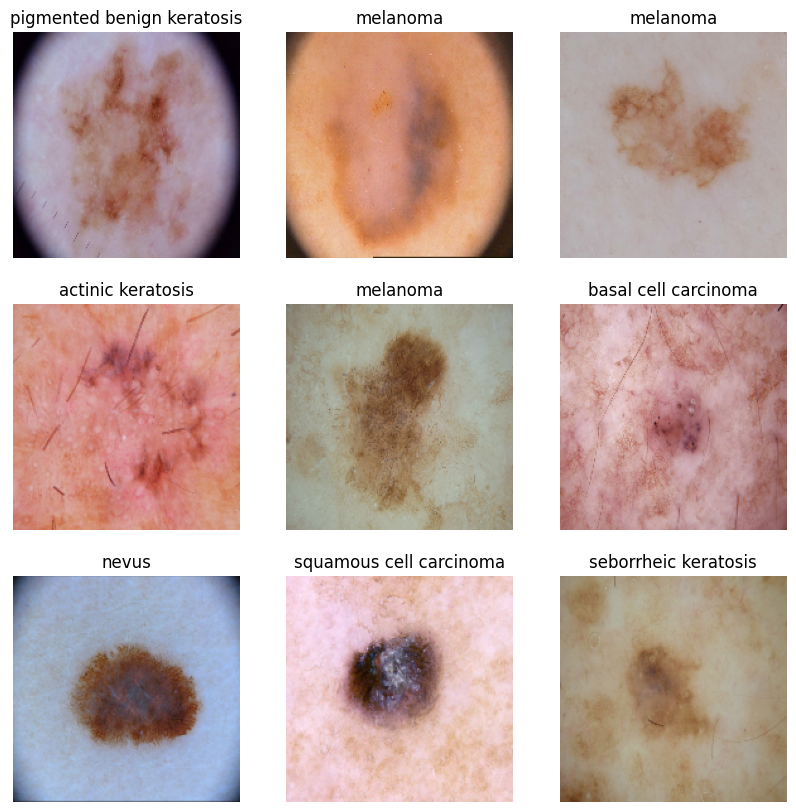

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):  # Take one batch of validation data
    for i in range(9):  # Assuming you want to display 9 images (adjust as needed)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")
plt.show()

In [ ]:
# ### Create a code to visualize one instance of all the nine classes present in the dataset
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

# class_check = {class_name:False for class_name in class_names}

# for images, labels in train_ds:
#   for image,label in zip(images,labels):
#     class_index = tf.argmax(label)
#     class_name = class_names[class_index]
#     if not class_check[class_name]:
#       print(f"class name: {class_name}")
#       # normalizing the image
#       plt.imshow(image/255.0)
#       plt.axis('off')
#       plt.show();
#       class_check[class_name]= True

#   if all(class_check.values()):
#     break

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the Model

In [ ]:
# Create a Sequential model with Dropout layers
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 41, 41, 128)      

In [ ]:
# Train the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 20s 86ms/step - loss: 2.0988 - accuracy: 0.1952 - val_loss: 2.0234 - val_accuracy: 0.1996
Epoch 2/20
57/57 [==============================] - 2s 37ms/step - loss: 1.8840 - accuracy: 0.3037 - val_loss: 1.8602 - val_accuracy: 0.3104
Epoch 3/20
57/57 [==============================] - 2s 36ms/step - loss: 1.6622 - accuracy: 0.4176 - val_loss: 1.5683 - val_accuracy: 0.4412
Epoch 4/20
57/57 [==============================] - 2s 32ms/step - loss: 1.4977 - accuracy: 0.4912 - val_loss: 1.5604 - val_accuracy: 0.4501
Epoch 5/20
57/57 [==============================] - 2s 32ms/step - loss: 1.3568 - accuracy: 0.5426 - val_loss: 1.5134 - val_accuracy: 0.4612
Epoch 6/20
57/57 [==============================] - 2s 32ms/step - loss: 1.4119 - accuracy: 0.5144 - val_loss: 1.5865 - val_accuracy: 0.4346
Epoch 7/20
57/57 [==============================] - 2s 33ms/step - loss: 1.3159 - accuracy: 0.5503 - val_loss: 1.5498 - val_accuracy: 0.4678
Epoch 8/20
5

### Visualizing training results

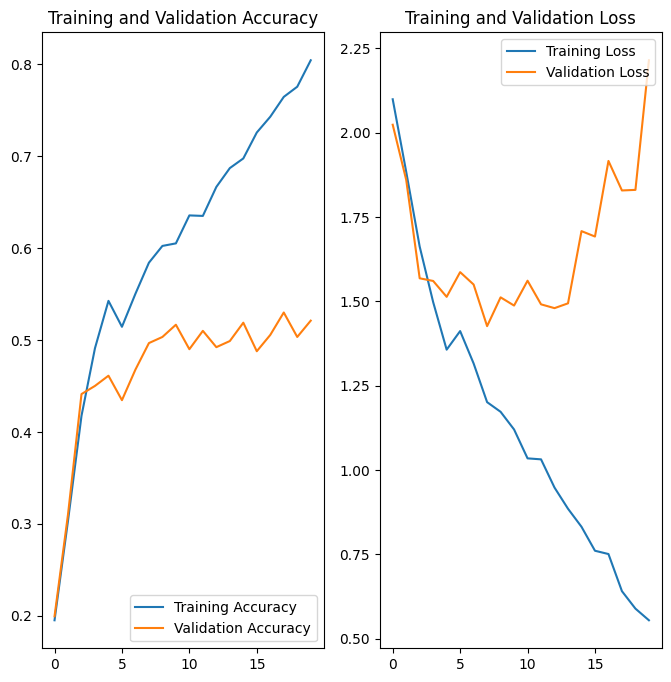

In [ ]:
# Visualize the performance of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- The model seems to look over fitting.
- To solev this we apply data augmentatoin technique to the images.

### Applying Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    brightness_range=[0.5, 1.5],
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',validation_split=0.2)

(180, 180, 3)
1


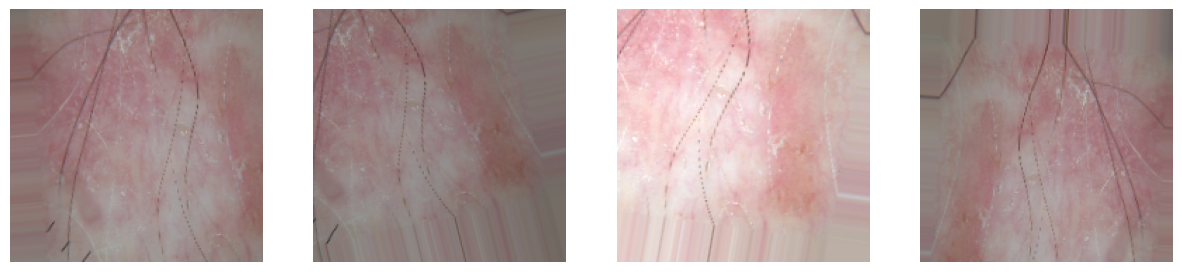

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.
for image,label in train_ds.take(1):
    original_image = image[0].numpy()
    print(original_image.shape)
    original_image = original_image.reshape((1,)+original_image.shape)
    data_itr = datagen.flow(original_image,batch_size=1)
    print(data_itr.batch_size)
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
    for i in range(4):
        image_gen = next(data_itr)[0].astype('uint8')
        ax[i].imshow(image_gen)
        ax[i].axis('off')

In [ ]:
# Create a Sequential model with Dropout layers
model_with_dropout = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout to the first Dense layer
    layers.Dense(9, activation='softmax')
])

In [ ]:
# Compiling the model
model_with_dropout.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
#Train your model for 20 epochs
train_generator = datagen.flow_from_directory(data_dir_train,
                                              class_mode="categorical",
                                              batch_size=batch_size,
                                              target_size=(img_height,img_width),
                                              seed = 123,
                                              subset="training")


history = model_with_dropout.fit_generator(train_generator,validation_data=val_ds,epochs=epochs)

Found 1811 images belonging to 9 classes.


<ipython-input-88-e83b76ba57c6>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_with_dropout.fit_generator(train_generator,validation_data=val_ds,epochs=epochs)


Epoch 1/20
57/57 [==============================] - 39s 611ms/step - loss: 2.0897 - accuracy: 0.1960 - val_loss: 2.0425 - val_accuracy: 0.1885
Epoch 2/20
57/57 [==============================] - 37s 641ms/step - loss: 2.0132 - accuracy: 0.2446 - val_loss: 1.8793 - val_accuracy: 0.2971
Epoch 3/20
57/57 [==============================] - 37s 645ms/step - loss: 1.8361 - accuracy: 0.3446 - val_loss: 1.8196 - val_accuracy: 0.3237
Epoch 4/20
57/57 [==============================] - 35s 611ms/step - loss: 1.7511 - accuracy: 0.3716 - val_loss: 1.8747 - val_accuracy: 0.2971
Epoch 5/20
57/57 [==============================] - 36s 637ms/step - loss: 1.6653 - accuracy: 0.4119 - val_loss: 1.6252 - val_accuracy: 0.4701
Epoch 6/20
57/57 [==============================] - 35s 612ms/step - loss: 1.5857 - accuracy: 0.4567 - val_loss: 1.5522 - val_accuracy: 0.4745
Epoch 7/20
57/57 [==============================] - 37s 638ms/step - loss: 1.5864 - accuracy: 0.4583 - val_loss: 1.5026 - val_accuracy: 0.4922

### Visualizing the training results

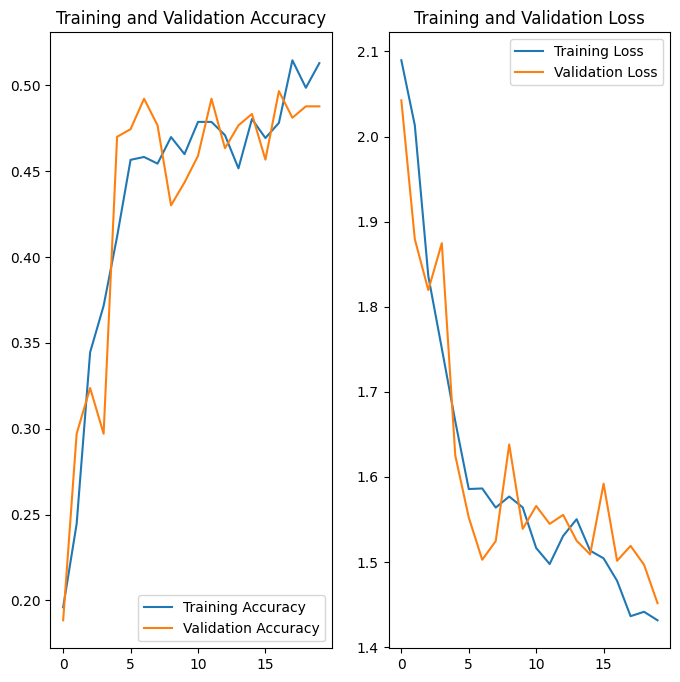

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- It is observed that the model is performing better when compared to the model without image augmentation and without applying dropout.
- But there is still scope for more improvements

#### Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### Find the distribution of classes in the training dataset

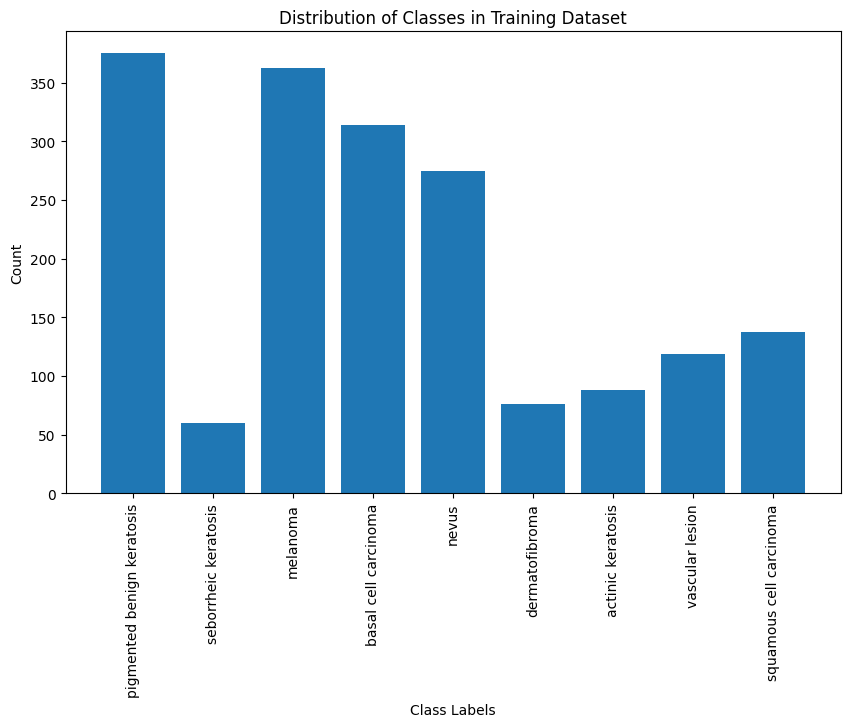

In [ ]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store class counts
class_counts = {}

# Loop through the training dataset to count the occurrences of each class
for images, labels in train_ds:
    for label in labels.numpy():
        class_label = class_names[label.argmax()]  # Convert one-hot encoding to class label
        if class_label in class_counts:
            class_counts[class_label] += 1
        else:
            class_counts[class_label] = 1

# Extract class labels and counts from the dictionary
class_labels = list(class_counts.keys())
class_count_values = list(class_counts.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_count_values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Dataset')
plt.xticks(rotation=90)
plt.show()

### Observations
- It is observed that the class distribution is not uniform. 'Seborrheic keratosis' has least number of images and 'pigmented benign keratosis' has highest number of images.
- Thus to achieve more accuracy it is needed to apply class imbalance technique.

### Applying Class Imbalance

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset="/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F39E81D2B60>: 100%|██████████| 500/500 [00:21<00:00, 23.10 Samples/s]


Initialised with 386 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3A38106230>: 100%|██████████| 500/500 [00:23<00:00, 21.60 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3A3809D840>: 100%|██████████| 500/500 [00:24<00:00, 20.49 Samples/s]


Initialised with 448 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F399F2377F0>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F3A3D00FD00>: 100%|██████████| 500/500 [01:11<00:00,  6.95 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F397B78FB20>: 100%|██████████| 500/500 [00:17<00:00, 29.21 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F399F236AA0>: 100%|██████████| 500/500 [00:40<00:00, 12.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F397B78F7F0>: 100%|██████████| 500/500 [00:17<00:00, 28.43 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3A25F57BE0>: 100%|██████████| 500/500 [00:18<00:00, 27.69 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
import os

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0025427.jpg_14429fb2-7572-4e32-939a-431ebf982b9a.jpg',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000079.jpg_7b27daf8-8d9d-4019-828a-1ad4a449617d.jpg',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027896.jpg_366376d4-eaac-4d1c-9c5b-2d24db7f7e25.jpg',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027650.jpg_3b5ef8d3-a179-4cfc-a3c6-2972d0b226d0.jpg',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
dataframe_dict_new

{'/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0025427.jpg_14429fb2-7572-4e32-939a-431ebf982b9a.jpg': 'nevus',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000079.jpg_7b27daf8-8d9d-4019-828a-1ad4a449617d.jpg': 'nevus',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027896.jpg_366376d4-eaac-4d1c-9c5b-2d24db7f7e25.jpg': 'nevus',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027650.jpg_3b5ef8d3-a179-4cfc-a3c6-2972d0b226d0.jpg': 'nevus',
 '/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imagi

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
df2['Label'].value_counts()

nevus                         500
vascular lesion               500
melanoma                      500
squamous cell carcinoma       500
pigmented benign keratosis    500
basal cell carcinoma          500
actinic keratosis             500
seborrheic keratosis          500
dermatofibroma                500
Name: Label, dtype: int64

##### So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Todo: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Create a training dataset
data_dir_train="/content/drive/MyDrive/Melanoma_Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6759 files belonging to 9 classes.
Using 5408 files for training.


In [ ]:
# Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6759 files belonging to 9 classes.
Using 1351 files for validation.


In [ ]:
# Create model including normalization
# Create a Sequential model with Dropout layers
model_with_aug = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout to the first Dense layer
    layers.Dense(9, activation='softmax')
])

In [ ]:
## Compile the model
model_with_aug.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model_with_aug.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (Batch  (None, 180, 180, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d_33 (Conv2D)          (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 89, 89, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 87, 87, 64)        73792     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 43, 43, 64)       

In [ ]:
# Trianing the model
epochs = 20
history = model_with_aug.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 39s 208ms/step - loss: 2.0286 - accuracy: 0.2065 - val_loss: 2.1726 - val_accuracy: 0.1095
Epoch 2/20
169/169 [==============================] - 52s 295ms/step - loss: 1.8075 - accuracy: 0.2964 - val_loss: 1.7839 - val_accuracy: 0.3242
Epoch 3/20
169/169 [==============================] - 38s 222ms/step - loss: 1.7360 - accuracy: 0.3419 - val_loss: 1.5218 - val_accuracy: 0.4389
Epoch 4/20
169/169 [==============================] - 38s 220ms/step - loss: 1.6365 - accuracy: 0.3746 - val_loss: 1.4578 - val_accuracy: 0.4589
Epoch 5/20
169/169 [==============================] - 35s 204ms/step - loss: 1.5852 - accuracy: 0.3948 - val_loss: 1.3760 - val_accuracy: 0.4567
Epoch 6/20
169/169 [==============================] - 37s 213ms/step - loss: 1.5072 - accuracy: 0.4135 - val_loss: 1.2670 - val_accuracy: 0.4774
Epoch 7/20
169/169 [==============================] - 37s 214ms/step - loss: 1.4180 - accuracy: 0.4473 - val_loss: 1.2436 - val_ac

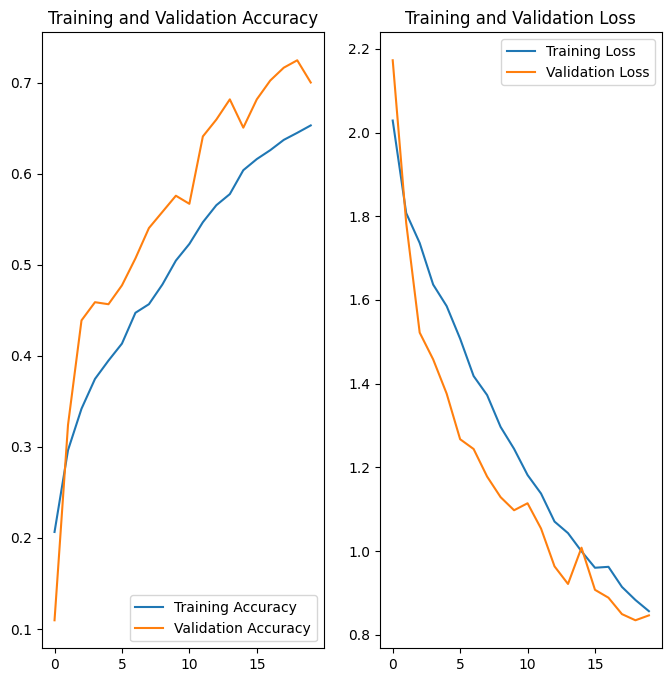

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations
The model has shown significant improvement in the performance when applied Class Imbalance.